Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.


In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [5]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [16]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format="%Y-%m-%d")
gas_df.head(4)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890


In [24]:
yearGasSum = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearGasSum

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

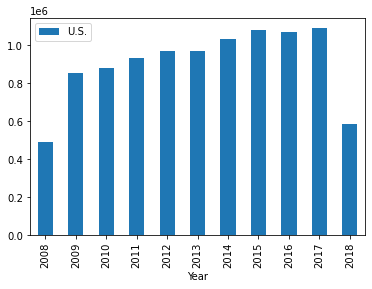

In [34]:
plot = yearGasSum.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

Text(0.5, 0, 'Year')

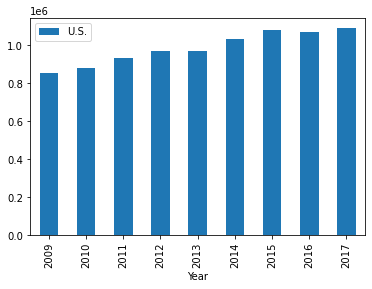

In [43]:
fullYears = np.logical_and(yearGasSum.index >= 2009, yearGasSum.index <= 2017)
FullYearsGasSum = yearGasSum[fullYears]
plot = FullYearsGasSum.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

Text(0.5, 0, 'Year')

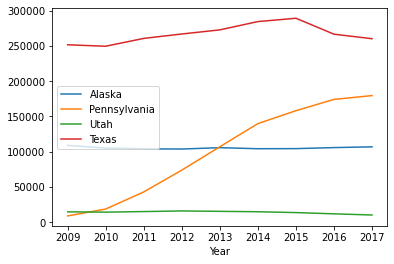

In [59]:
FullYearsGasSum.columns[1:].sort_values()
plot = FullYearsGasSum.filter(items=['Alaska', 'Pennsylvania', 'Utah', 'Texas']).plot()
plot.set_xlabel("Year")

In [63]:
oilProdFile = "U.S._crude_oil_production.csv"
oilProdDf = pd.read_csv(oilProdFile)

In [66]:
oilProdDf['Month'] = pd.to_datetime(oilProdDf['Month'], format="%Y-%m-%d")

In [79]:
yearlyGas = gas_df.groupby(oilProdDf['Month'].dt.year).sum().filter(items=['U.S.'])
yearlyGas.columns = [ 'Gas' ]
yearlyGas.head(4)

,Gas
Month,
2008,489473
2009,856876
2010,881622
2011,936163


In [78]:
yearlyOil = oilProdDf.groupby(oilProdDf['Month'].dt.year).sum().filter(items=['U.S. Crude Oil '])
yearlyOil.columns = [ 'Crude Oil' ]
yearlyOil.head(4)

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741
2011,67829


In [83]:
yearlyMerged = pd.concat([yearlyOil, yearlyGas], axis='columns')
yearlyMerged

,Crude Oil,Gas
Month,,
2008,34211,489473
2009,64180,856876
2010,65741,881622
2011,67829,936163
2012,78007,968632
2013,89585,970617
2014,105064,1032439
2015,113179,1082158
2016,105970,1070085


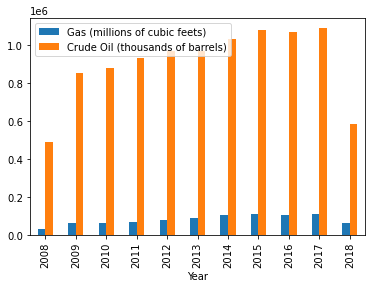

In [85]:
plot = yearlyMerged.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (millions of cubic feets)', 'Crude Oil (thousands of barrels)'])

In [7]:
from requests import get
apiData = get("https://cloud.iexapis.com/stable/stock/aapl/chart/3m?token=sk_3009300071db4352b403cc2f527cc59f").json()
dataframe = pd.DataFrame.from_dict(apiData)

In [8]:
dataframe

,date,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
0,2020-08-21,119.26,124.37,124.87,119.25,338054640,477.05,497.48,499.47,477.00,84513660,0.00,0.0000,"Aug 21, 20",0.000000
1,2020-08-24,128.70,125.86,128.79,123.94,345937768,514.79,503.43,515.14,495.75,86484442,1.49,1.1964,"Aug 24, 20",0.011964
2,2020-08-25,124.70,124.83,125.18,123.05,211495788,498.79,499.30,500.72,492.21,52873947,-1.03,-0.8208,"Aug 25, 20",0.003658
3,2020-08-26,126.18,126.52,126.99,125.08,163022268,504.72,506.09,507.97,500.33,40755567,1.70,1.3603,"Aug 26, 20",0.017311
4,2020-08-27,127.14,125.01,127.49,123.83,155552384,508.57,500.04,509.94,495.33,38888096,-1.51,-1.1958,"Aug 27, 20",0.005146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020-11-16,118.92,120.30,120.99,118.15,91183018,118.92,120.30,120.99,118.15,91183018,1.04,0.8720,"Nov 16, 20",-0.032725
61,2020-11-17,119.55,119.39,120.67,118.96,74270973,119.55,119.39,120.67,118.96,74270973,-0.91,-0.7564,"Nov 17, 20",-0.040042
62,2020-11-18,118.61,118.03,119.82,118.00,76322111,118.61,118.03,119.82,118.00,76322111,-1.36,-1.1391,"Nov 18, 20",-0.050977
63,2020-11-19,117.59,118.64,119.06,116.81,74112972,117.59,118.64,119.06,116.81,74112972,0.61,0.5168,"Nov 19, 20",-0.046072


In [9]:
dataframe['date'] = pd.to_datetime(dataframe['date'], format="%Y-%m-%d")
dataframe.head(3)

,date,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
0,2020-08-21,119.26,124.37,124.87,119.25,338054640,477.05,497.48,499.47,477.00,84513660,0.00,0.0000,"Aug 21, 20",0.000000
1,2020-08-24,128.70,125.86,128.79,123.94,345937768,514.79,503.43,515.14,495.75,86484442,1.49,1.1964,"Aug 24, 20",0.011964
2,2020-08-25,124.70,124.83,125.18,123.05,211495788,498.79,499.30,500.72,492.21,52873947,-1.03,-0.8208,"Aug 25, 20",0.003658


In [10]:
dataframe.set_index('date')

,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime
date,,,,,,,,,,,,,,
2020-08-21,119.26,124.37,124.87,119.25,338054640,477.05,497.48,499.47,477.00,84513660,0.00,0.0000,"Aug 21, 20",0.000000
2020-08-24,128.70,125.86,128.79,123.94,345937768,514.79,503.43,515.14,495.75,86484442,1.49,1.1964,"Aug 24, 20",0.011964
2020-08-25,124.70,124.83,125.18,123.05,211495788,498.79,499.30,500.72,492.21,52873947,-1.03,-0.8208,"Aug 25, 20",0.003658
2020-08-26,126.18,126.52,126.99,125.08,163022268,504.72,506.09,507.97,500.33,40755567,1.70,1.3603,"Aug 26, 20",0.017311
2020-08-27,127.14,125.01,127.49,123.83,155552384,508.57,500.04,509.94,495.33,38888096,-1.51,-1.1958,"Aug 27, 20",0.005146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,118.92,120.30,120.99,118.15,91183018,118.92,120.30,120.99,118.15,91183018,1.04,0.8720,"Nov 16, 20",-0.032725
2020-11-17,119.55,119.39,120.67,118.96,74270973,119.55,119.39,120.67,118.96,74270973,-0.91,-0.7564,"Nov 17, 20",-0.040042
2020-11-18,118.61,118.03,119.82,118.00,76322111,118.61,118.03,119.82,118.00,76322111,-1.36,-1.1391,"Nov 18, 20",-0.050977


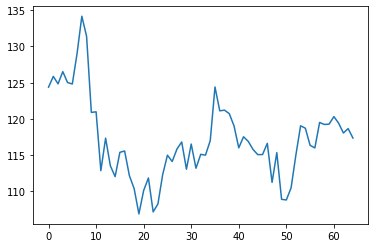

In [11]:
dataframe['close'].plot()

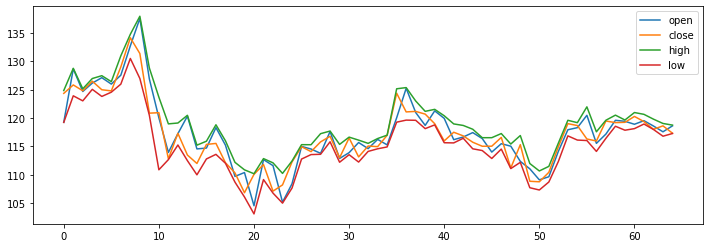

In [12]:
dataframe[['open', 'close', 'high', 'low']].plot(figsize=(12,4))

In [13]:
amzn = "https://cloud.iexapis.com/stable/stock/amzn/chart/1y?token=sk_3009300071db4352b403cc2f527cc59f"
fb = "https://cloud.iexapis.com/stable/stock/fb/stats?token=sk_3009300071db4352b403cc2f527cc59f"
apple = "https://cloud.iexapis.com/stable/stock/aapl/financials?token=sk_3009300071db4352b403cc2f527cc59f"
tsla = "https://cloud.iexapis.com/stable/stock/tsla/news/last/1?token=sk_3009300071db4352b403cc2f527cc59f"
energy = "https://cloud.iexapis.com/stable/stock/market/sector-performance?token=sk_3009300071db4352b403cc2f527cc59f"

In [15]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [18]:
response = requests.get("http://books.toscrape.com/")
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
# Can you spot which HTML contains one book? Is it identical for each book?
<article class="product_pod">...</article>

In [23]:
booksNotParsed = soup.find_all("article", class_="product_pod")
len(books)

20

In [25]:
booksNotParsed[0] # Will give us only the first book on the list of books

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [35]:
FirstBookTitle = booksNotParsed[0].find("h3").find("a").attrs['title']
FirstBookTitle

'A Light in the Attic'

In [43]:
FirstBookPrice = float(booksNotParsed[0].find("p", class_="price_color").string[1:])
FirstBookPrice

51.77

In [44]:
book_stars_html = booksNotParsed[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [45]:
book_stars_html.attrs['class']


['star-rating', 'Three']

In [47]:
def parse_rating(rating_classes):
    if 'One' in rating_classes:
        return 1
    if 'Two' in rating_classes:
        return 2
    if 'Three' in rating_classes:
        return 3
    if 'Four' in rating_classes:
        return 4
    if 'Five' in rating_classes: 
        return 4

In [48]:
parse_rating(book_stars_html.attrs['class'])

3

In [54]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

for book in booksNotParsed:
    title = book.find("h3").find("a").attrs["title"]
    price = float(book.find("p", class_="price_color").text[1:])
    rating = parse_rating(book.find("p", class_="star-rating").attrs['class'])
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating)

    
books_dict


{'Title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Price': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  3

In [55]:
len(books_dict) 
len(books_dict["Title"])

20

In [56]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,4
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


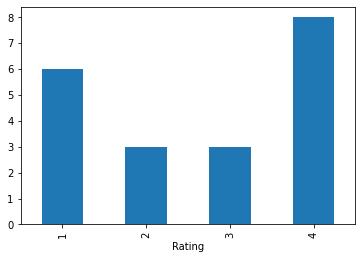

In [57]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")


In [58]:
page = 1
url = f"http://books.toscrape.com/catalogue/page-{page}.html"
url

'http://books.toscrape.com/catalogue/page-1.html'

In [60]:
all_books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

MAX_PAGE = 30
for page in range(1, MAX_PAGE + 1):
    print(f"Parsing page {page}...")
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.find("h3").find("a").attrs["title"]
        price = float(book.find("p", class_="price_color").text[1:])
        rating = parse_rating(book.find("p", class_="star-rating").attrs["class"])
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating)

print("All pages of books have been downloaded & parsed !")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Parsing page 6...
Parsing page 7...
Parsing page 8...
Parsing page 9...
Parsing page 10...
Parsing page 11...
Parsing page 12...
Parsing page 13...
Parsing page 14...
Parsing page 15...
Parsing page 16...
Parsing page 17...
Parsing page 18...
Parsing page 19...
Parsing page 20...
Parsing page 21...
Parsing page 22...
Parsing page 23...
Parsing page 24...
Parsing page 25...
Parsing page 26...
Parsing page 27...
Parsing page 28...
Parsing page 29...
Parsing page 30...
All pages of books have been downloaded & parsed !


In [62]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.to_excel('books.xlsx', sheet_name='Books')
